In [16]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


with open('exp4_unlabeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['lipton-excess'] = df['lipton'] - df['bayes_error']
df['oracle-excess'] = df['oracle'] - df['bayes_error']

measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target lipton-excess           oracle-excess          
                              mean       std          mean       std
0        25      100      0.264944  0.178551      0.077847  0.062201
1        50      100      0.257528  0.153817      0.087769  0.053334
2       100       25      0.230635  0.121846      0.090433  0.048381
3       100       50      0.259927  0.120775      0.102818  0.052054
4       100      100      0.250772  0.125379      0.089190  0.045376
5       100      200      0.254935  0.123691      0.091138  0.046702
6       100      400      0.237496  0.126089      0.090273  0.052700
7       100      800      0.229482  0.122153      0.082894  0.048372
8       100     1600      0.243795  0.125349      0.084479  0.052437
9       100     3200      0.256046  0.122479      0.098987  0.058242
10      100     6400      0.230570  0.122458      0.098153  0.048294
11      100    12800      0.235008  0.126838      0.097792  0.046374
12      200      100      0.228979  0.105851      0.092958  0.050002
13      400      100      0.217132  0.081430      0.085703  0.045906
14      800      100      0.199646  0.070822      0.064946  0.045645
15     1600      100      0.181059  0.057781      0.052794  0.041210
16     3200      100      0.177219  0.048913      0.042472  0.050877
17     6400      100      0.156696  0.048859      0.031948  0.048458
18    12800      100      0.154693  0.050507      0.035193  0.041648

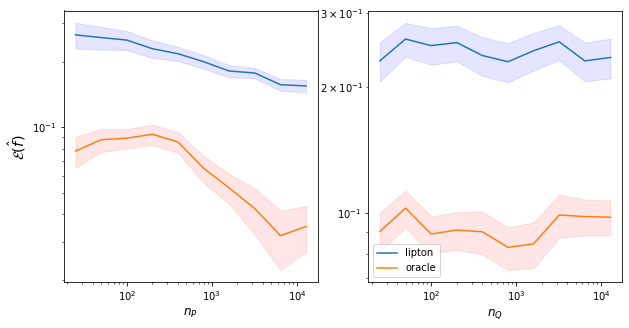

In [17]:
result1 = result.loc[result['n_target'] == 100]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 100]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()

In [18]:
with open('exp4_labeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['classical-excess'] = df['classical'] - df['bayes_error']
df['labeled-excess'] = df['labeled'] - df['bayes_error']

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target classical-excess           labeled-excess          
                                 mean       std           mean       std
0       100      100         0.064962  0.049595       0.071988  0.048284
1       100      300         0.060513  0.046713       0.060615  0.046064
2       100      700         0.058598  0.049554       0.058387  0.048837
3       100     1500         0.045932  0.049648       0.041084  0.046479
4       100     3100         0.029121  0.045422       0.029226  0.043105
5       100     6300         0.031256  0.040767       0.030447  0.040086
6       100    12700         0.027770  0.048820       0.026861  0.047656
7       300      100         0.064100  0.047130       0.076165  0.048488
8       700      100         0.058919  0.046391       0.062185  0.046344
9      1500      100         0.060626  0.049265       0.057501  0.046290
10     3100      100         0.064426  0.047029       0.046749  0.046493
11     6300      100         0.059230  0.042697       0.032766  0.045744
12    12700      100         0.059132  0.041283       0.023432  0.046155

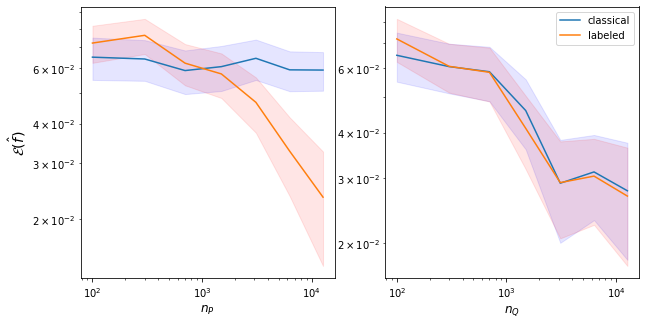

In [19]:
result1 = result.loc[result['n_target'] == 100]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 100]

n, mean, std = result2['n_target'], result2['classical-excess']['mean'], result2['classical-excess']['std']
mean_o, std_o = result2['labeled-excess']['mean'], result2['labeled-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('classical', 'labeled'), loc='middle left')
plt.show()